# Titanic Survival

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

import pandas_profiling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [6]:
df1 = test.merge(gender,how = 'inner', on = 'PassengerId')

In [7]:

df2 = pd.concat([df1,train], axis = 0)

# Data Cleansing

In [8]:
pandas_profiling.ProfileReport(df2)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mode())

In [10]:
df2['Cabin'] = df2["Cabin"].fillna('Missing')

In [11]:
df2 = df2.dropna()

In [12]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [13]:
df2 = df2.drop(['PassengerId','Ticket'], axis = 1)

In [14]:
df2['Cabin'].unique()

array(['Missing', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'A34',
       'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2', 'A18',
       'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105', 'C123', 'E46', 'C103', 'D56', 'A6', 'D33', 'B30', 'C83',
       'F G73', 'A5', 'D26', 'C110', 'E101', 'D47', 'B86', 'C2', 'B19',
       'A7', 'C49', 'B4', 'B80', 'A31', 'D36', 'C93', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49', 'D', 'C65',
       'E36', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'B35', 'C82',
       'B96

In [15]:
df2['Cabin'] = df2['Cabin'].astype(str).str[0]
df2['Cabin'].value_counts()

M    773
C     86
B     61
D     42
E     38
A     19
F     18
G      5
T      1
Name: Cabin, dtype: int64

# Exploratory Data Analysis

In [16]:
pd.pivot_table(df2, index = 'Cabin', values = ['Age','SibSp','Parch','Fare'] )

Age        Fare     Parch     SibSp
Cabin                                           
A      44.157895   41.019732  0.210526  0.210526
B      36.032787  125.383267  0.704918  0.459016
C      38.382791  111.918219  0.453488  0.720930
D      39.702381   55.116174  0.285714  0.428571
E      38.118421   55.735197  0.394737  0.368421
F      21.333333   19.018289  0.555556  0.444444
G      12.000000   14.205000  1.200000  0.600000
M      27.363842   19.718709  0.402329  0.503234
T      45.000000   35.500000  0.000000  0.000000

In [17]:
pd.pivot_table(df2, index = 'Survived', columns = 'Cabin', values = 'Name', aggfunc = 'count')

Cabin        A     B     C     D     E     F    G      M    T
Survived                                                     
0          9.0  20.0  37.0  14.0  12.0   8.0  2.0  525.0  1.0
1         10.0  41.0  49.0  28.0  26.0  10.0  3.0  248.0  NaN

In [18]:
df2.describe()

Pclass          Age        SibSp        Parch         Fare  \
count  1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean      2.209012    29.813202     0.504314     0.421860    36.603024   
std       0.840685    14.366254     0.913080     0.840655    55.753648   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%       1.000000    21.000000     0.000000     0.000000     8.050000   
50%       2.000000    28.000000     0.000000     0.000000    15.750000   
75%       3.000000    39.000000     1.000000     1.000000    35.077100   
max       3.000000    80.000000     8.000000     6.000000   512.329200   

          Survived  
count  1043.000000  
mean      0.397891  
std       0.489697  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

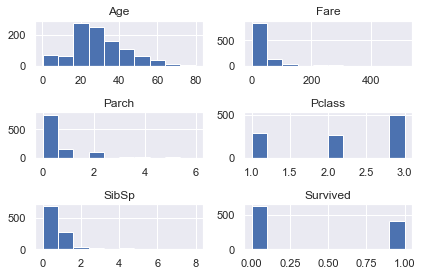

In [19]:
df2.hist()
plt.tight_layout()
plt.show()

In [20]:
df2.head()

Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch     Fare Cabin Embarked  Survived  
0      0   7.8292     M        Q         0  
1      0   7.0000     M        S         1  
2      0   9.6875     M        Q         0  
3      0   8.6625     M        S         0  
4      1  12.2875     M        S         1

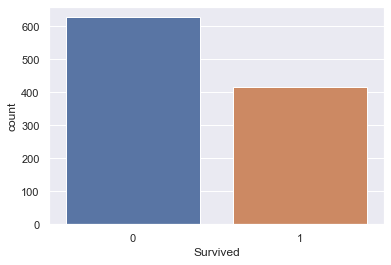

In [21]:
sns.countplot(x = 'Survived',  data = df2)


In [54]:
df_majority = df2[df2['Survived'] == 0]
df_majority.shape

(628, 9)

In [23]:
#resampling to acheive a balanced dataset.
df_majority = df2[df2['Survived'] == 0]
df_minority = df2[df2['Survived'] == 1]

df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 628,
                                random_state = 123)

df2 = pd.concat([df_majority,df_minority_upsampled])


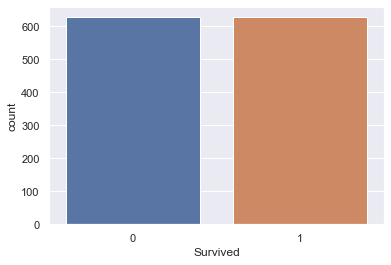

In [24]:
sns.countplot(x = 'Survived',  data = df2)

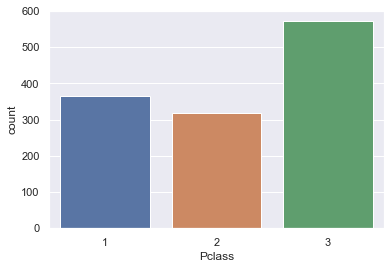

In [25]:
sns.countplot(x = 'Pclass', data = df2)


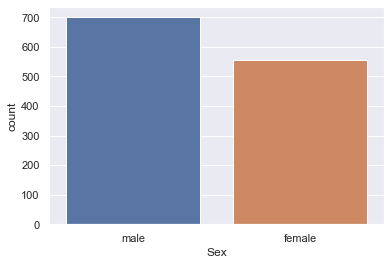

In [26]:

sns.countplot(x = 'Sex', data = df2)


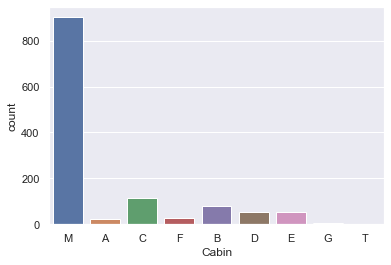

In [27]:
sns.countplot(x = 'Cabin', data = df2)

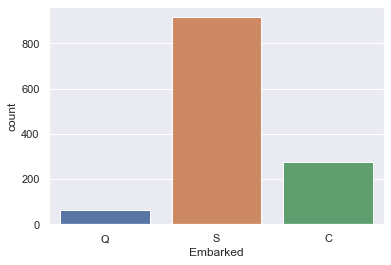

In [28]:
sns.countplot(x = 'Embarked', data = df2)

# Feature Engineering

In [29]:
dictionary = {'B':'Rare',
             'C': 'Rare',
             'E':'Rare',
             'A':'Rare',
             'D':'Rare',
             'F':'Rare',
             'G':'Rare',
             'T':'Rare',
             'M':'Missing'}

df2['Cabin'] = df2['Cabin'].map(dictionary)

In [30]:
df2['Cabin'].value_counts()

Missing    902
Rare       354
Name: Cabin, dtype: int64

In [31]:

dictionary_2 = {'S':'S',
               'Q': 'Rare',
               'C': 'Rare'}

df2['Embarked'] = df2['Embarked'].map(dictionary_2)

In [32]:
df2['Embarked'].value_counts()

S       916
Rare    340
Name: Embarked, dtype: int64

In [33]:
df2.drop('Name', axis = 1, inplace = True)

In [34]:
dummies = pd.get_dummies(df2[['Pclass','Sex','Cabin','Embarked']], drop_first = True)

In [35]:

df3 = pd.concat([df2,dummies], axis = 1)

In [36]:
df3.drop(['Pclass','Sex','Cabin','Embarked'], axis = 1, inplace = True)

In [37]:
df3.head()

Age  SibSp  Parch     Fare  Survived  Sex_male  Cabin_Rare  Embarked_S
0  34.5      0      0   7.8292         0         1           0           0
2  62.0      0      0   9.6875         0         1           0           0
3  27.0      0      0   8.6625         0         1           0           1
5  14.0      0      0   9.2250         0         1           0           1
7  26.0      1      1  29.0000         0         1           0           1

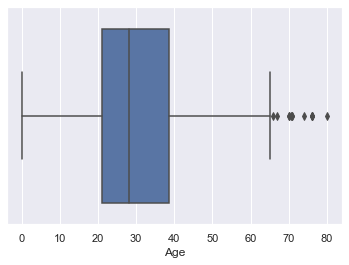

In [38]:
sns.boxplot(x = 'Age', data = df3)

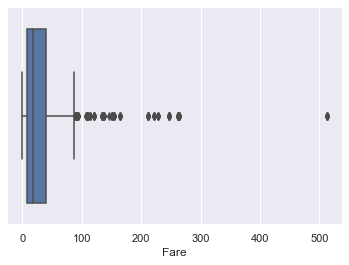

In [39]:
sns.boxplot(x = 'Fare', data = df3)

In [40]:

# removing outliers
from feature_engine.outlier_removers import Winsorizer
winsorizer = Winsorizer(distribution = 'skewed', tail = 'both', fold = 1.5, variables =['Age','Fare','SibSp','Parch'])
winsorizer.fit(df3)
df4 = winsorizer.transform(df3)

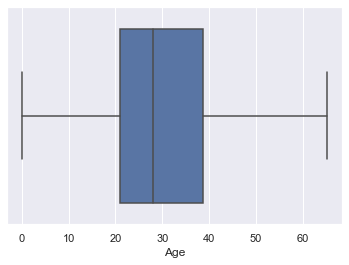

In [41]:
sns.boxplot(x = 'Age', data = df4)

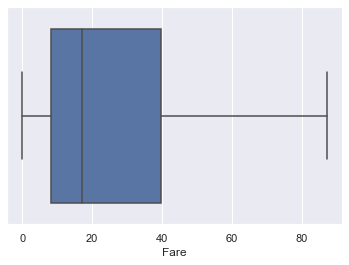

In [42]:
sns.boxplot(x = 'Fare', data = df4)

# Machine Learning

In [43]:
X = df4[df4.drop('Survived', axis = 1).columns]
y = df4['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [44]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
lr_score = accuracy_score(y_test, predictions)
lr_score

0.8452380952380952

In [80]:
tree = DecisionTreeClassifier()

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
              
grid = GridSearchCV(tree, tree_param, cv = 5)
grid.fit(x_train,y_train)
param = grid.best_params_
print(param)

{'criterion': 'gini', 'max_depth': 150}


In [45]:
tree_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 150)
tree_grid.fit(x_train, y_train)
predictions = tree_grid.predict(x_test)
tree_score = accuracy_score(y_test, predictions)
tree_score

0.8611111111111112

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 2)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
grid = GridSearchCV(rf, grid_rf, cv = 5,verbose = True, n_jobs = -1)
grid.fit(x_train,y_train)
params = grid.best_params_
print(params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.8min finished


{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
rf_grid = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto',
                                 max_depth = 100, bootstrap = True, random_state = 0)

rf_grid.fit(x_train,y_train)
predictions = rf_grid.predict(x_test)
rf_score = accuracy_score(y_test, predictions)
rf_score

0.9007936507936508

In [48]:
xgb_params = {"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
              "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ] }

xgbooster = xgb.XGBClassifier()
grid_xgb = GridSearchCV(xgbooster, xgb_params, cv = 5, verbose = True, n_jobs = -1)
grid_xgb.fit(x_train,y_train)
params = grid_xgb.best_params_
print(params)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 1956 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 4356 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7556 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 9456 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 11556 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13856 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 16356 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 19056 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 19200 out of 

{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1}


In [49]:
xgbooster_grid = xgb.XGBClassifier(colsample_bytree = 0.5,
                            gamma = 0.1,
                            learning_rate = 0.2,
                            max_depth = 5,
                            min_child_weight = 1)

xgbooster_grid.fit(x_train, y_train)
predictions = xgbooster_grid.predict(x_test)
xgb_score = accuracy_score(y_test, predictions)
xgb_score

0.876984126984127

In [50]:
#SVM requires standardizing the dataset before use.

scaler = StandardScaler()

x_train_scaled = x_train
x_test_scaled = x_test


x_train_scaled[['Age','Fare']] = pd.DataFrame(scaler.fit_transform(x_train_scaled[['Age','Fare']]))
x_test_scaled[['Age','Fare']] = pd.DataFrame(scaler.fit_transform(x_test_scaled[['Age','Fare']]))

x_train_scaled[['Age','Fare']] = x_train_scaled[['Age','Fare']].fillna(0)
x_test_scaled[['Age','Fare']] = x_test_scaled[['Age','Fare']] .fillna(0)
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm = SVC()
grid = GridSearchCV(svm, param_grid, cv = 5, verbose = True, n_jobs = -1)
grid.fit(x_train_scaled,y_train)
params = grid.best_params_
print(params)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    2.5s remaining:    0.2s


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.3s finished


In [51]:

svm2 = SVC(C = 10, gamma = 0.1, kernel = 'rbf', probability = True)
svm2.fit(x_train, y_train)
predictions = svm2.predict(x_test)
svm_score = accuracy_score(y_test, predictions)
svm_score

0.8531746031746031

In [52]:

table = pd.DataFrame(data = [lr_score,tree_score,rf_score,xgb_score, svm_score], index = ['LR','DT','RF','XGB','SVM'], columns = ['Algorithm'])
table

Algorithm
LR    0.845238
DT    0.861111
RF    0.900794
XGB   0.876984
SVM   0.853175

Random Forest has the highest accuracy score of 90%